This is a basic example of fitting a linear regression using two methods. The first method will use the Normal Equation and the second method will use sklearn linear_model. 

The data that will be used for this exercise is automobile information. The data is available from UCI's repository, which can be found at the following link.
https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

This data set contains 9 columns. The file was prepared to include the headers in the data file for easier loading of the data.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df_cars = pd.read_csv('automobile.csv')
df_cars.head()

,mpg,cyl,disp,hpower,weight,acc,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df_cars.shape

(398, 9)

As can be seen the columns selected are mpg, cylinder count, displacement, horse power, weight, acceleration, year, country origin, and name. The data size is 398 cars.

In [4]:
df_cars.year.min(), df_cars.year.max()

(70, 82)

A check of the oldest and newest car shows that this data is for cars from the 70s and early 80s.

The goal of this exercise is to fit a linear model to determine the mpg based on the weight of the car.

The first step is visualize the data.

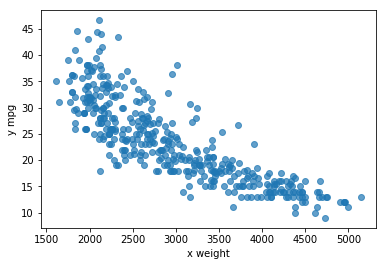

In [5]:
plt.xlabel('x weight')
plt.ylabel('y mpg')
plt.scatter(df_cars.weight, df_cars.mpg, alpha=.7)

The plot clearly shows that the heavier the car the worse the gas mileage is.

The regression will be determined using two separate methods to see how they compare. The first method will use the Normal equation and the second method is using the scikit-learn's linear model.

First though the data has to be formatted in a manner that will make it easy to use for both methods.

### Data Preperation

In [6]:
x_minmax = np.array([df_cars.weight.min(), df_cars.weight.max()])
x_minmax

X = df_cars.weight

X_b = np.c_[np.ones((X.size,1)), X]
display(X_b[:5])

y = df_cars.mpg
display(y.shape)
display(y[:5])

array([[1.000e+00, 3.504e+03],
       [1.000e+00, 3.693e+03],
       [1.000e+00, 3.436e+03],
       [1.000e+00, 3.433e+03],
       [1.000e+00, 3.449e+03]])

(398,)

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

### Normal Equation

$\theta=(X^TX)^{-1}X^Ty$

In [7]:
np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

array([ 4.63173644e+01, -7.67661006e-03])

In [8]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
intercept = theta_best[0]
coef = theta_best[1]
print('intercept:', intercept)
print('coef (theta):', coef)

intercept: 46.31736442026565
coef (theta): -0.007676610063926458


$y = 46.317+-0.008*X$  
Where y is mpg and X is the weights of all the cars

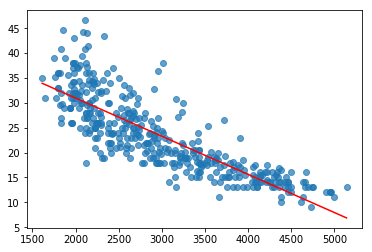

In [9]:
plt.scatter(X, y, alpha=0.7)
plt.plot(x_minmax, x_minmax*coef + intercept, c='r');

The red line depicts the model

### Linear Model

In [10]:
lm = linear_model.LinearRegression()

In [11]:
lm.fit(X.values.reshape(-1,1), y)

print('inetercept: ',lm.intercept_)
print('coefficient:', lm.coef_)
print('R^2:', lm.score(X.values.reshape(-1,1), y))

inetercept:  46.31736442026564
coefficient: [-0.00767661]
R^2: 0.6917929800341575


The results using the linear regression model produces the same values as the normal equation.

The R^2, which explains how much of the independent variable (X) explains the model, shows roughly 0.69 where the a perfect fit would be 1.0

### Multivariate Linear Regression

By adding additional variables can the R^2 value be increased? There are techniques to identify which variables are most relevant when conducting a multivariate regression but for this exercise variables were randomly chosen to add.

### Two indepedent variables

#### Normal Equation

In [12]:
X2 = df_cars[['weight', 'cyl']]
X2.shape

(398, 2)

In [13]:
X2_b = np.c_[np.ones((X2.shape[0], 1)), X2]
np.linalg.inv(X2_b.T.dot(X2_b)).dot(X2_b.T).dot(y)

array([ 4.63937024e+01, -6.41225055e-03, -7.02508051e-01])

#### Linear Model

In [14]:
lm2 = linear_model.LinearRegression()
lm2.fit(X2.values.reshape(-1,2), y)
print('intercept:', lm2.intercept_)
print('coef:', lm2.coef_)
print('R^2:', lm2.score(X2.values.reshape(-1,2), y))

intercept: 46.393702353374096
coef: [-0.00641225 -0.70250805]
R^2: 0.6964013933838316


The coefficients and intercept are the same for both the normal and linear equation. The R^2 increased slightly from 0.69 to 0.70.

### 4 indepedent variables

Next the independent variables were included to 4.

In [15]:
X4 = df_cars[['weight', 'cyl', 'disp','acc']]
X4.shape

(398, 4)

In [16]:
X4_b = np.c_[np.ones((X4.shape[0], 1)), X4]
np.linalg.inv(X4_b.T.dot(X4_b)).dot(X4_b.T).dot(y)

array([ 4.18609752e+01, -6.15502231e-03, -2.59222871e-01, -7.11292284e-03,
        1.75130855e-01])

In [17]:
lm4 = linear_model.LinearRegression()
lm4.fit(X4.values.reshape(-1,4), y)
print('intercept:', lm4.intercept_)
print('coef:', lm4.coef_)
print('R^2:', lm4.score(X4.values.reshape(-1,4), y))

intercept: 41.860975201822946
coef: [-0.00615502 -0.25922287 -0.00711292  0.17513085]
R^2: 0.7006973903323617


The coefficients and the intercept again are identical for the normal equation and the linear equation. The R^2 did remained the same at 0.70 when using four independent variables. Of course the results may be different if other variables were used. 

In this, case the since the difference between a single independent variable and four independent variables is extremely small, it would be simpler to use the model with a single independent variable. It is easier to understand and explain as well as easier on computing resources.